# Búsquedas

Dado el siguiente grafo de estados:

\begin{align*}
A(h=5)   &: (C, 3),\ (H, 1) \\
B(h=9)   &: (C, 5),\ (F, 5),\ (G, 1) \\
C(h=4)   &: (F, 3),\ (G, 2),\ (H, 2) \\
D(h=7)   &: (F, 4) \\
E(h=8)   &: (A, 2),\ (C, 4),\ (D, 5),\ (G, 1),\ (I, 4) \\
F(h=2)   &: (A, 1),\ (C, 4),\ (D, 1),\ (H, 2),\ (J, 5) \\
G(h=9)   &: (B, 1) \\
H(h=8)   &: (B, 5),\ (E, 1) \\
I(h=12)  &: (E, 2) \\
J(h=0)   &: \\
\end{align*}

Define los 5 primeros estados expandidos usando DFS, UCS y $A^*$ para la busqueda desde $A$ hasta $J$

In [31]:
import sys

sys.path.append("..")

from AI_algorithms.state_graphs import Graph, parse_input
from AI_algorithms.state_graphs.searchs import AStarSearch, DFSearch, UCSearch

Cargamos el grafo a nuestra estructura establecida

In [32]:
input_ = '''
A(h=8): (E,2),(G,4),(H,1),(I,2),
B(h=8): (E,1),(F,4),(H,4),
C(h=4): (D,1),(G,3),(H,3),
D(h=4): (C,5),(J,5),
E(h=7): (D,3),(F,5),
F(h=5): (C,4),(E,5),(G,3),(I,2),
G(h=6): (C,5),(D,1),(F,2),
H(h=5): (E,1),
I(h=8): (A,5),
J(h=0):
'''
c,h = parse_input(input_)

G = Graph(c,h)
G.print_structure()

A(h = 8)  :  (E,2), (G,4), (H,1), (I,2)
B(h = 8)  :  (E,1), (F,4), (H,4)
C(h = 4)  :  (D,1), (G,3), (H,3)
D(h = 4)  :  (C,5), (J,5)
E(h = 7)  :  (D,3), (F,5)
F(h = 5)  :  (C,4), (E,5), (G,3), (I,2)
G(h = 6)  :  (C,5), (D,1), (F,2)
H(h = 5)  :  (E,1)
I(h = 8)  :  (A,5)
J(h = 0)  :  


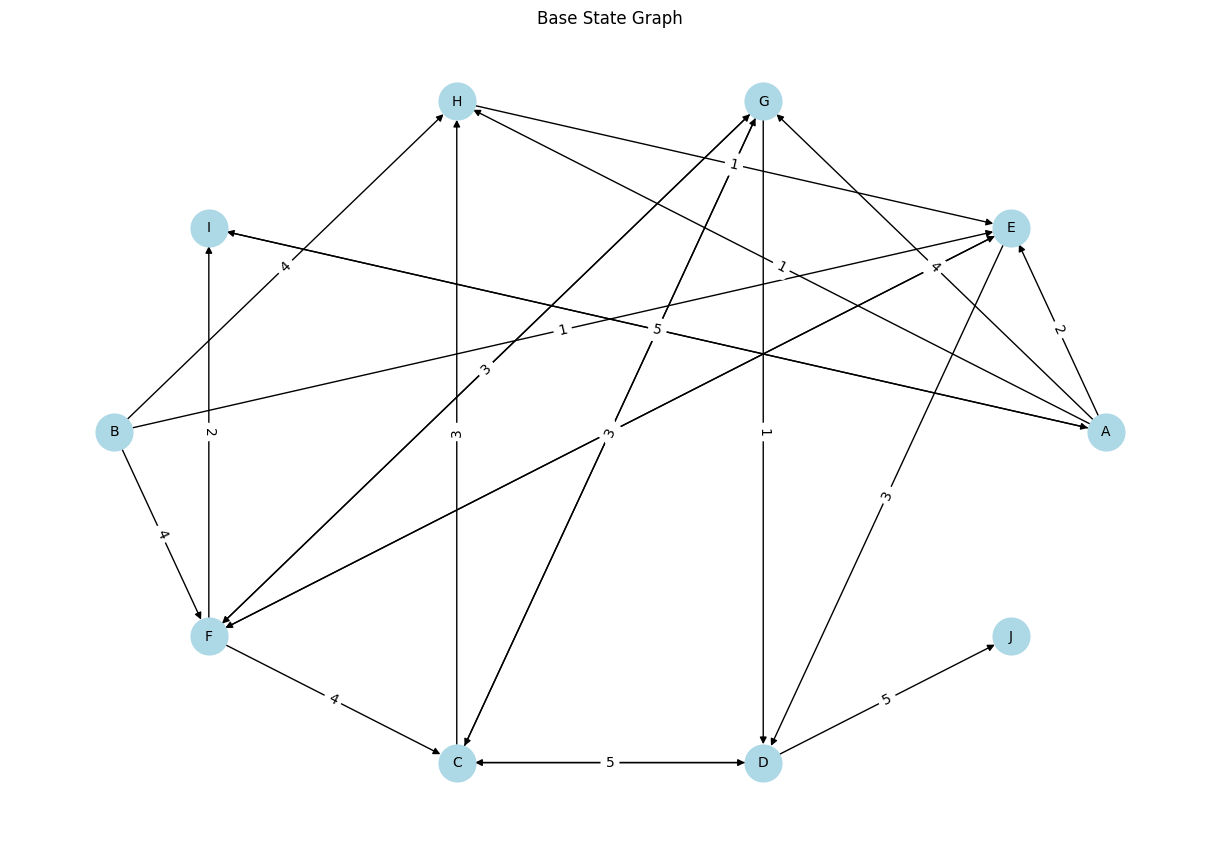

In [33]:
G.draw(title="Base State Graph")

## DFS

In [34]:
path = DFSearch(G, 'A', 'J',criteria = 'descending label', verbose=True)

Out: A  -  Fridge: ['A']
Out: E  -  Fridge: ['I', 'H', 'G', 'E']
Out: D  -  Fridge: ['I', 'H', 'G', 'F', 'D']
Out: C  -  Fridge: ['I', 'H', 'G', 'F', 'J', 'C']
Out: J  -  Fridge: ['I', 'H', 'G', 'F', 'J']

Out order: A E D C J


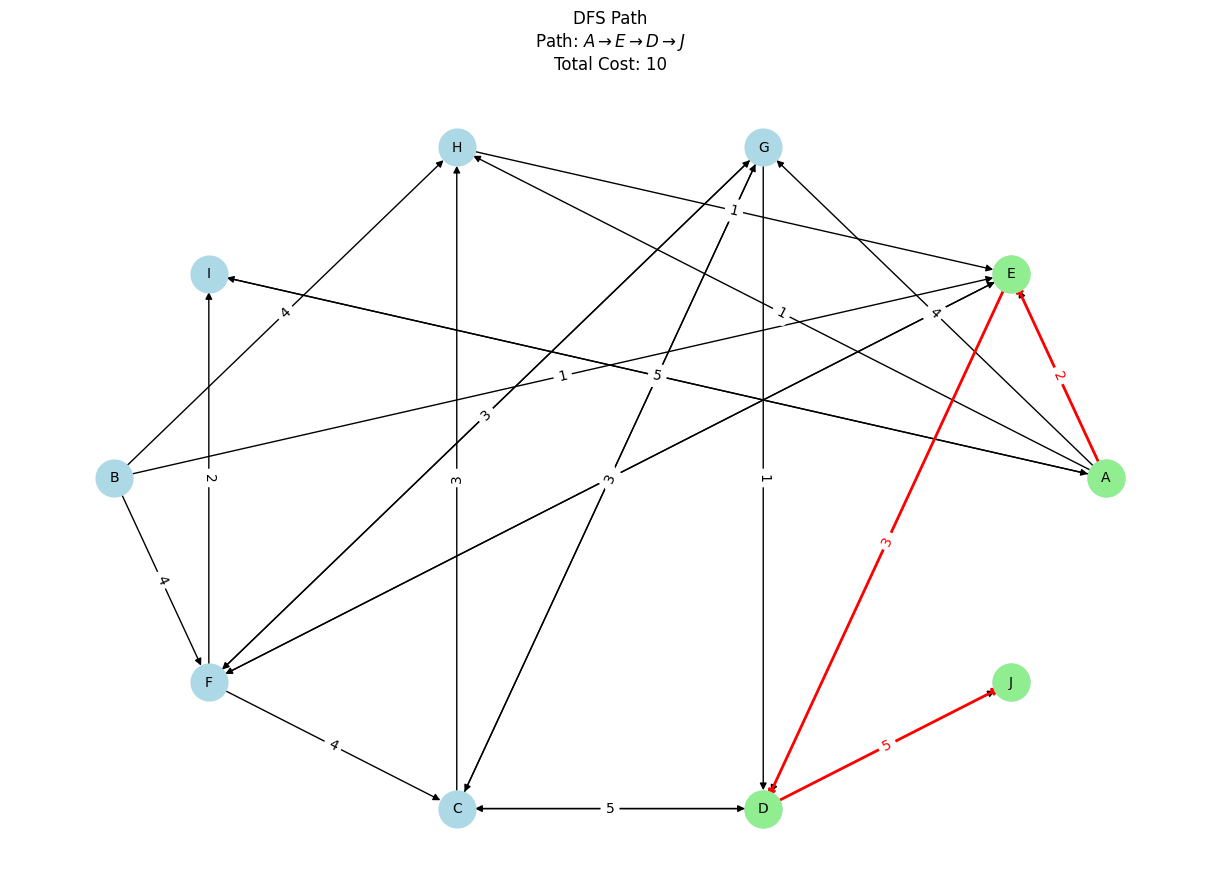

In [35]:
G.draw(path = path, title="DFS Path")

Para este escenario, la respuesta es: $A C F D J$

## UCS

In [36]:
path = UCSearch(G, 'A', 'J', verbose=True, reached=False)

Out: A g: 0  
Out: H g: 1  
Out: E g: 2  
Out: E g: 2  
Out: I g: 2  
Out: G g: 4  
Out: D g: 5  
Out: D g: 5  
Out: D g: 5  
Out: F g: 6  
Out: A g: 7  
Out: F g: 7  
Out: F g: 7  
Out: H g: 8  
Out: I g: 8  
Out: C g: 9  
Out: E g: 9  
Out: E g: 9  
Out: G g: 9  
Out: I g: 9  
Out: I g: 9  
Out: I g: 9  
Out: C g: 10 
Out: C g: 10 
Out: C g: 10 
Out: C g: 10 
Out: D g: 10 
Out: D g: 10 
Out: G g: 10 
Out: G g: 10 
Out: J g: 10 

Out order: A H E E I G D D D F A F F H I C E E G I I I C C C C D D G G J


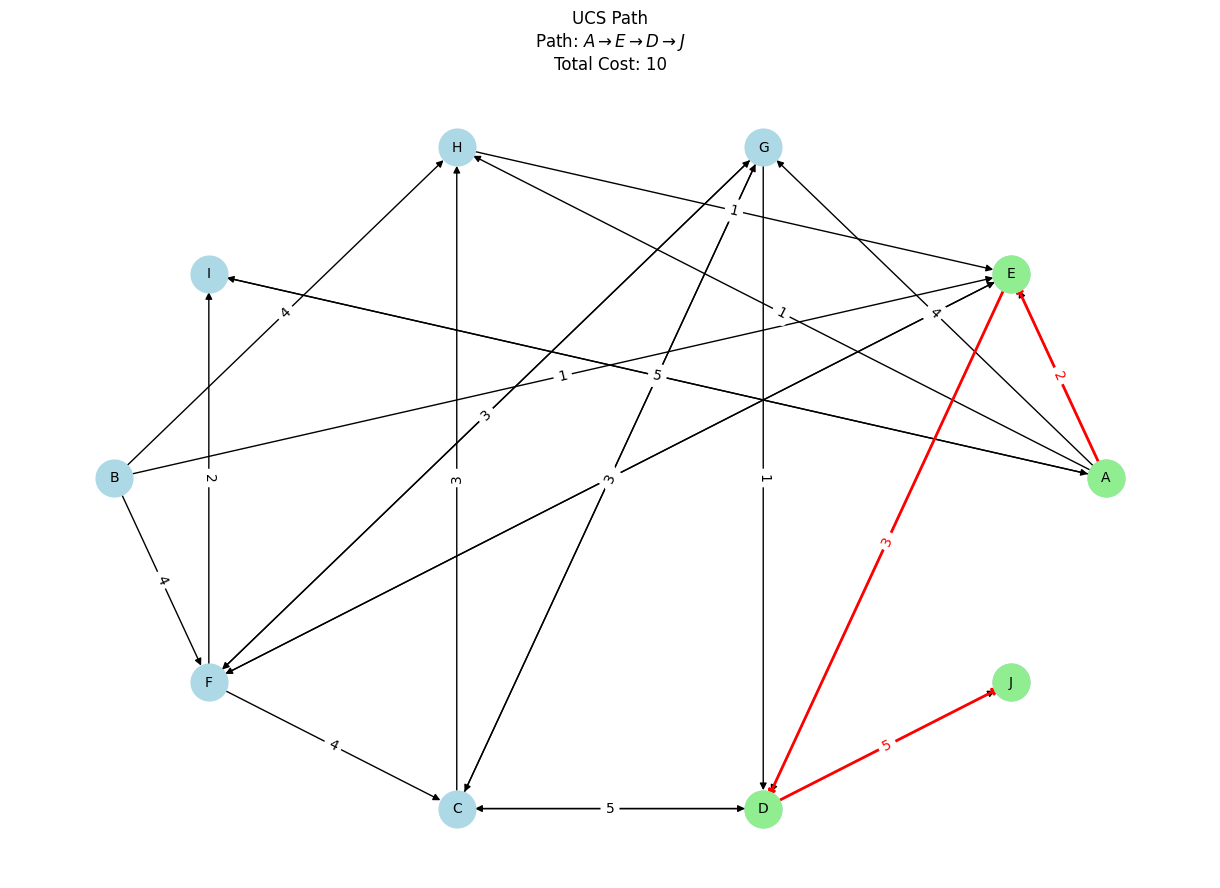

In [37]:
G.draw(path = path, title="UCS Path")

Para este escenario, la respuesta es: $A H E C G$

## $A^*$

In [38]:
path = AStarSearch(G, 'A', 'J', verbose=True, reached = False)

Out: A g: 0   h: 8   f: 8  
Out: H g: 1   h: 5   f: 6  
Out: E g: 2   h: 7   f: 9  
Out: D g: 5   h: 4   f: 9  
Out: E g: 2   h: 7   f: 9  
Out: D g: 5   h: 4   f: 9  
Out: G g: 4   h: 6   f: 10 
Out: D g: 5   h: 4   f: 9  
Out: I g: 2   h: 8   f: 10 
Out: J g: 10  h: 0   f: 10 

Out order: A H E D E D G D I J


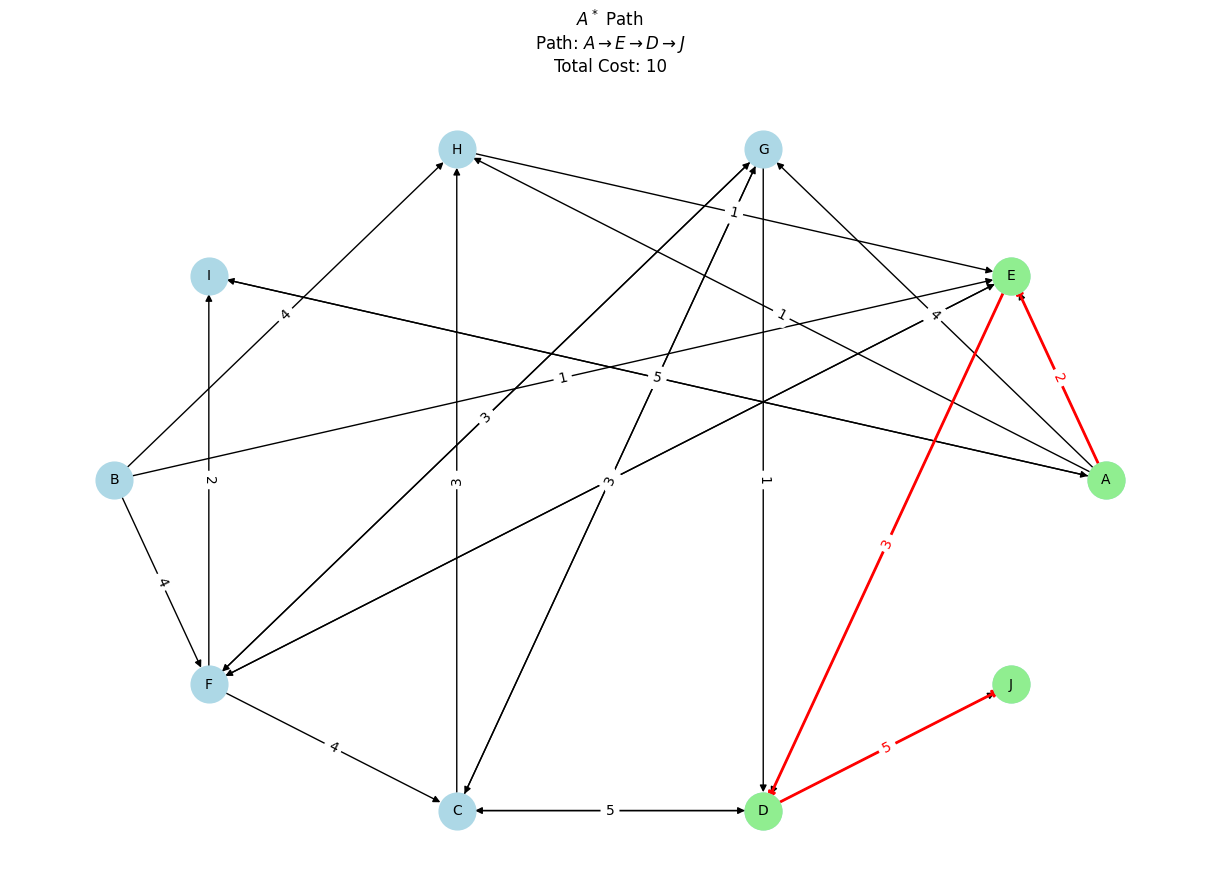

In [39]:
G.draw(path = path, title="$A^*$ Path")

Para este escenario, la respuesta es: $A C F H E$